In [ ]:
!pip install kaggle

In [ ]:
kaggle ='/content/kaggle.json'

In [ ]:
!mkdir ~/.kaggle
!cp {kaggle} ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d olafkrastovski/handwritten-digits-0-9

Dataset URL: https://www.kaggle.com/datasets/olafkrastovski/handwritten-digits-0-9
License(s): CC0-1.0
  0% 0.00/66.7M [00:00<?, ?B/s]
100% 66.7M/66.7M [00:00<00:00, 1.43GB/s]


In [ ]:
import os
from zipfile import ZipFile

file_name = 'handwritten-digits-0-9.zip'

extract_folder = 'dataset'
os.makedirs(extract_folder, exist_ok=True)

with ZipFile(file_name, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)
    print('Done')

Done


In [ ]:
data_0 = os.listdir('/content/dataset/0')
data_1 = os.listdir('/content/dataset/1')
data_2 = os.listdir('/content/dataset/2')
data_3 = os.listdir('/content/dataset/3')
data_4 = os.listdir('/content/dataset/4')
data_5 = os.listdir('/content/dataset/5')
data_6 = os.listdir('/content/dataset/6')
data_7 = os.listdir('/content/dataset/7')
data_8 = os.listdir('/content/dataset/8')
data_9 = os.listdir('/content/dataset/9')

In [ ]:
len(data_0)

2236

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

dataset_path = '/content/dataset' # Sesuaikan dengan folder hasil unzip Anda
img_size = 28 # Kita seragamkan ukuran gambar jadi 28x28 pixel
data = []
labels = []

# 2. Loop membaca folder angka 0-9
for angka in range(10):
    folder_angka = os.path.join(dataset_path, str(angka))
    # Cek isi folder
    if os.path.exists(folder_angka):
        print(f"Mengambil data angka {angka}...")
        for file_gambar in os.listdir(folder_angka):
            try:
                # Baca gambar & ubah jadi hitam putih (grayscale)
                img_path = os.path.join(folder_angka, file_gambar)
                img_array = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

                # Resize agar semua ukuran sama
                resized_array = cv2.resize(img_array, (img_size, img_size))

                data.append(resized_array)
                labels.append(angka)
            except Exception as e:
                pass

# 3. Ubah list menjadi Numpy Array & Normalisasi (0-1)
X = np.array(data) / 255.0
X = X.reshape(-1, img_size, img_size, 1) # Dimensi untuk Keras

# 4. Encoding Label (Sesuai konsep Neural Network)
# Mengubah angka "5" menjadi [0,0,0,0,0,1,0,0,0,0]
y = to_categorical(np.array(labels), num_classes=10)

# 5. Bagi Data Training & Testing (Sesuai Modul Hal 8)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nSelesai! Data siap.")
print(f"Jumlah Data Latih: {len(X_train)}")
print(f"Jumlah Data Uji: {len(X_test)}")

Mengambil data angka 0...
Mengambil data angka 1...
Mengambil data angka 2...
Mengambil data angka 3...
Mengambil data angka 4...
Mengambil data angka 5...
Mengambil data angka 6...
Mengambil data angka 7...
Mengambil data angka 8...
Mengambil data angka 9...

Selesai! Data siap.
Jumlah Data Latih: 17244
Jumlah Data Uji: 4311


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Input

# 1. Definisi Model Sequential
model = Sequential()

# Input Layer: Meratakan gambar 28x28 menjadi 784 input
model.add(Input(shape=(img_size, img_size, 1)))
model.add(Flatten())

# Hidden Layer 1 (128 Neuron)
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2)) # Mencegah overfitting

# Hidden Layer 2 (64 Neuron)
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

# Output Layer (10 Neuron untuk angka 0-9)
model.add(Dense(10, activation='softmax'))

# 2. Kompilasi Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Tampilkan struktur model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Sedang memproses data (Inverting colors)...

Mulai Training Model...
Epoch 1/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3195 - loss: 1.9440 - val_accuracy: 0.6167 - val_loss: 1.2757
Epoch 2/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6127 - loss: 1.2322 - val_accuracy: 0.7205 - val_loss: 0.9370
Epoch 3/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7211 - loss: 0.9117 - val_accuracy: 0.7791 - val_loss: 0.7485
Epoch 4/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7698 - loss: 0.7228 - val_accuracy: 0.8026 - val_loss: 0.6355
Epoch 5/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8127 - loss: 0.5956 - val_accuracy: 0.8281 - val_loss: 0.5482
Epoch 6/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8467 - loss: 0.5012 - val_accuracy: 0.8431 - val_loss: 0.5053
Epoch 7/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8665 - loss: 0.4298 - val_accuracy: 0.8562 - val_loss: 0.4721
Epoch 8/50
432/432 ━━━━━━━━━━━━━━━━

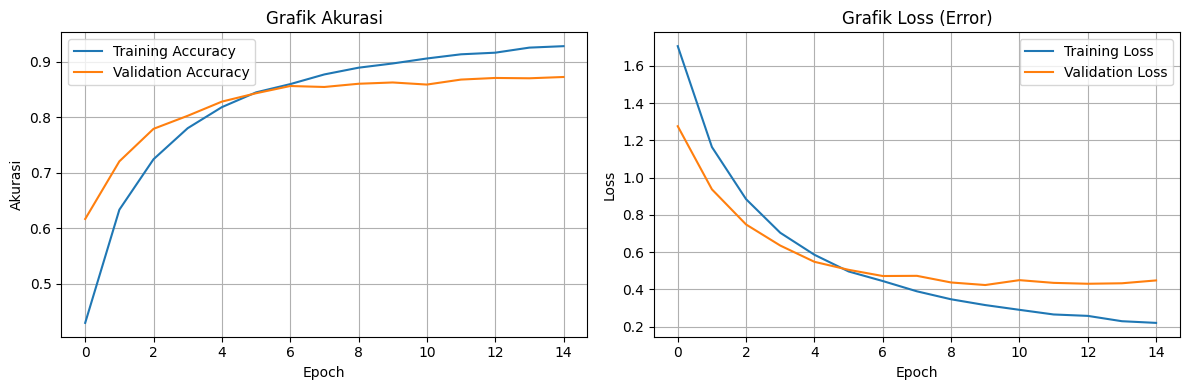

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

# --- 1. PREPROCESSING (FIX WARNA) ---
# Kita balik warna gambar dulu sebelum di-split (Background Putih -> Hitam)
print("Sedang memproses data (Inverting colors)...")
X_inverted = 1.0 - X  # Rumus pembalik warna
y_integer = np.array(labels) # Pastikan label berupa array integer

# Split Data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X_inverted, y_integer, test_size=0.2, random_state=42)

# --- 2. DEFINISI MODEL ---
model = Sequential([
    Input(shape=(28, 28, 1)),
    Flatten(),
    Dense(128, activation='relu'), # Hidden Layer 1
    Dropout(0.2),                  # Dropout
    Dense(64, activation='relu'),  # Hidden Layer 2
    Dropout(0.2),                  # Dropout
    Dense(10, activation='softmax') # Output Layer (0-9)
])

# Kompilasi dengan sparse_categorical_crossentropy (karena label bukan one-hot)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# --- 3. TRAINING DENGAN EARLY STOPPING ---
# Setting Early Stopping (Berhenti jika tidak ada perbaikan dalam 5 epoch)
callback = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

print("\nMulai Training Model...")
history = model.fit(X_train, y_train,
                    epochs=50,           # Batas maks 50 (bisa berhenti lebih cepat)
                    batch_size=32,
                    validation_split=0.2, # Ambil 20% dari training untuk validasi
                    callbacks=[callback],
                    verbose=1)

# --- 4. EVALUASI HASIL AKHIR ---
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\n===== HASIL AKHIR =====")
print(f"Akurasi pada Data Test: {accuracy*100:.2f}%")

# --- 5. VISUALISASI GRAFIK ---
plt.figure(figsize=(12, 4))

# Grafik Akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Grafik Akurasi')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()
plt.grid(True)

# Grafik Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Grafik Loss (Error)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

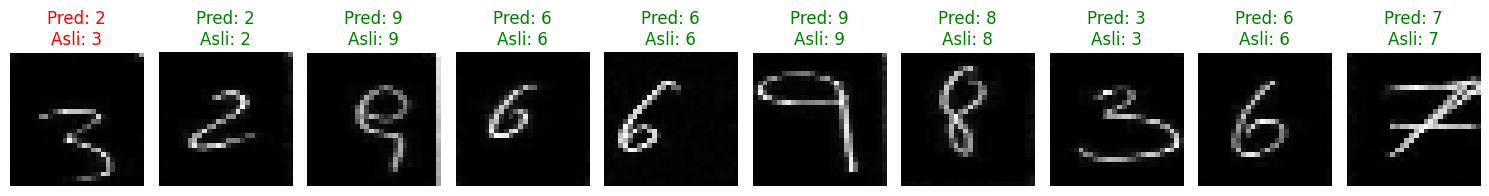

In [ ]:
# --- 6. UJI COBA VISUAL (BUKTI MODEL BEKERJA) ---
import numpy as np
import matplotlib.pyplot as plt

# Ambil 10 indeks acak dari data test
indices = np.random.randint(0, len(X_test), 10)

plt.figure(figsize=(15, 3))

for i, idx in enumerate(indices):
    plt.subplot(1, 10, i+1)

    # Ambil gambar asli
    img = X_test[idx].reshape(28, 28)

    # Model melakukan prediksi
    img_input = X_test[idx].reshape(1, 28, 28, 1)
    prediksi = model.predict(img_input, verbose=0)
    label_prediksi = np.argmax(prediksi) # Ambil angka dengan probabilitas tertinggi
    label_asli = y_test[idx]

    # Tampilkan Gambar
    plt.imshow(img, cmap='gray')

    # Beri warna hijau jika benar, merah jika salah
    warna = 'green' if label_prediksi == label_asli else 'red'

    plt.title(f"Pred: {label_prediksi}\nAsli: {label_asli}", color=warna)
    plt.axis('off')

plt.tight_layout()
plt.show()